**Lists: append() and insert()**
-----

Test cases:

In [2]:
class ListAppendTest:
    """
        A list of size n created on setup.
        list.append(x) method tested.
    """
    def __init__(self, n):
        self.data = list([1]*n)
        self.n = n

    def run(self):
        self.data.append(42)

In [3]:
class ListInsertTest:
    """
        A list of size n created on setup.
        list.insert(n/2, x) method tested.
    """
    def __init__(self, n):
        self.data = list([1]*n)
        self.n = n

    def run(self):
        self.data.insert(int(self.n/2), 42)

---
Plotting helper:

In [54]:
import matplotlib.pyplot as plt
import numpy as np
import timeit
import time


def my_timeit_with_setup(TestClass, n, T):    
    """
        TestClass: class[name] of test case
        T: number of test runs
    """
    results = []
    for _ in range(0, T):
        test = TestClass(n)  
        t1 = time.process_time()
        test.run()        
        t2 = time.process_time()
        results.append((t2-t1))        
    
    return np.mean(results)*1e6


def plot_time_vs_n(TestClass, n_max=50000, T=20):
    """
        TestClass(n): class[name] of test case
        
        n_max: 
               to investigate dependence on n, we use
               range(start=n_max/10, stop=n_max, step=n_max/100)
               
        T: number of test runs per data point 
        
        **kwargs: passed to plt.plot (plot color etc.)
    """  
    xxx = []
    yyy = []
    for n in range(n_max//10, n_max, 500):
        xxx.append(n)
        yyy.append(my_timeit_with_setup(TestClass, n, T))
    
    plt.xlabel("n")
    plt.ylabel("time / usec")
    return plt.plot(xxx, yyy)

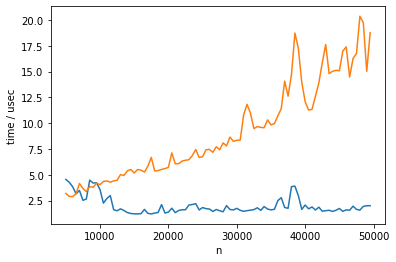

In [55]:
plot_time_vs_n(ListAppendTest);
plot_time_vs_n(ListInsertTest);

Conclusion
---

**Append**  
Usually doesn't need to move aroud existing elements of the list in memory.  
Takes amortized constant time O(1).

**Insert in the middle**  
Has to move half on the existing elements of the list in memory.  
Time depends linearely on the length _n_ of the list, O(_n_).